##### <p> Samuel Wolfe <br> June 16th, 2023 <br> MSBA 206 <br> DMBA Case 21.4 </p>

In [75]:
#setting up core functions
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

def readFile(fileLocation):
    df = pd.read_csv(fileLocation)
    return df
def normalize(df):
    dfNorm = (df - df.mean(numeric_only=True)) / df.std(numeric_only=True)
    dfNorm = dfNorm.dropna(axis=1)
    return dfNorm
def correlate(df):
    dfCorr = df.corr(numeric_only=True)
    return dfCorr
def statslist(df):
    dfStats = pd.DataFrame({'Mean' : df.mean(numeric_only=True),
            'SD' : df.std(numeric_only=True),
            'Min' : df.min(), 
            'Max' : df.max(),
            'Median' : df.median(numeric_only=True),
            })
    return dfStats

##### 21.4
21.4.1. Setting up a series of groups, filters, and counts, we find that for those who received the flyer there was an increase in<br>&emsp; &emsp;
        5.8%  to the target variable of MOVED_AD = 1. This indicates the flyer does have an impact on this dataset.<br>
21.4.2. Looking at the data and applying a few categories to some graphs, I believe the following at the predictors with good potential to increase the value of the flyer.<br>&emsp; &emsp;
        Must send out to: PARTY_D, HH_ND, GENDER_F, COMM_PT, VPP_08, VPR_08, H_F1<br>&emsp; &emsp; &emsp;
        The above variables show the highest positive relationship to our target variable of MOVED_AD. As such we want to seek these individuals out. <br>&emsp; &emsp;
        Must not send out to: PARTY_R, HH_NR, VPP_12, GENDER_M<br>&emsp; &emsp; &emsp;
        The above variables show the highest negative relationship to our target variable of MOVED_AD. As such we want to avoid these individuals. <br>&emsp; &emsp;
        The first chart shows Male vs Female voters who either received or did not receive the flyer and if they were moved.<br>&emsp; &emsp; &emsp;
        This chart demonstrates that more females are moved by the letter than males.<br>&emsp; &emsp;
        Chart two is barplot 2 and it breaks down target variable over HH_ND (household non democrats) and splits it by male and female.<br>&emsp; &emsp; &emsp;
        This chart demonstrates that households with more females not already aligned to the target variables party have a much larger impact.<br>&emsp; &emsp;
        
        

        




In [76]:
#1
dfVoters = readFile(r'E:\Aliit\School\MSBA\206\dmba-datasets\Voter-Persuasion.csv')
flyerYN = 'MESSAGE_A'
targetVar = 'MOVED_A'
#1 == Flyer, 0 == No Flyer
dfVotersFlyerY = dfVoters.loc[dfVoters[flyerYN] == 1]
dfVotersFlyerN = dfVoters.loc[dfVoters[flyerYN] == 0]
#Count of Voter Movement with Flyer
dfratioMovedFY = dfVotersFlyerY.groupby(targetVar)[targetVar].count().to_frame()
dfratioMovedFN = dfVotersFlyerN.groupby(targetVar)[targetVar].count().to_frame()
#Voter Movement as a percent
# Flyer == No == 34.44%
# Flyer == Yes == 40.24%
WavePercMovedFY = (dfratioMovedFY.at[1,targetVar]/len(dfVotersFlyerY.index)) * 100
WavePercMovedFN = (dfratioMovedFN.at[1,targetVar]/len(dfVotersFlyerN.index)) * 100


In [77]:
#2
#slim, normalize, correlate the data
trimlist = ['VOTER_ID','SET_NO','opposite','MESSAGE_A_REV','MOVED_AD','Partition']
dfVotersSlim = dfVoters.drop(columns=trimlist)
dfVotersNorm = normalize(dfVotersSlim)
#selecting best variables
dfVotersCorr = correlate(dfVotersNorm)
dfVotersCorrTarget = dfVotersCorr.loc['MOVED_A'].sort_values(ascending=False)
cutoff1 = 0.0
cutoffPos = 0.1
cutoffNeg = 0.15
dfVotersCorrTgtPos = dfVotersCorrTarget[dfVotersCorrTarget > cutoff1]
dfVotersCorrTgtPos = dfVotersCorrTgtPos.sort_values(ascending=False)
dfVotersCorrTgtPos = dfVotersCorrTgtPos[dfVotersCorrTgtPos > cutoffPos]
dfVotersCorrTgtPos = dfVotersCorrTgtPos[dfVotersCorrTgtPos != 1]

dfVotersCorrTgtNeg = abs(dfVotersCorrTarget[dfVotersCorrTarget < cutoff1])
dfVotersCorrTgtNeg = dfVotersCorrTgtNeg.sort_values(ascending=False)
dfVotersCorrTgtNeg = dfVotersCorrTgtNeg[dfVotersCorrTgtNeg > cutoffNeg]
dfVotersCorrTgtNeg = dfVotersCorrTgtNeg[dfVotersCorrTgtNeg != 1]

print('Top Corr Positive')
print(dfVotersCorrTgtPos)
print('\n\n')
print('Top Corr Negative')
print(dfVotersCorrTgtNeg)


Top Corr Positive
PARTY_D     0.345692
HH_ND       0.259323
GENDER_F    0.167524
COMM_PT     0.155096
VPP_08      0.115435
VPR_08      0.110937
H_F1        0.108169
Name: MOVED_A, dtype: float64



Top Corr Negative
PARTY_R     0.415191
HH_NR       0.279504
VPP_12      0.171780
GENDER_M    0.167524
Name: MOVED_A, dtype: float64


In [78]:
#positives
listPos = dfVotersCorrTgtPos.index.to_list()
dfVSTPos = dfVotersSlim[dfVotersSlim.columns.intersection(listPos)]
dfVSTPosStats = statslist(dfVSTPos).dropna()
dfVSTPosStats = dfVSTPosStats.sort_values(by=['SD'], ascending=False)
print(dfVSTPosStats)

            Mean        SD  Min  Max  Median
COMM_PT   3.8733  4.935006    0   19     2.0
HH_ND     1.2118  1.310005    0    9     1.0
PARTY_D   0.4743  0.499364    0    1     0.0
GENDER_F  0.5704  0.495044    0    1     1.0
VPP_08    0.2220  0.415612    0    1     0.0
VPR_08    0.1576  0.364384    0    1     0.0
H_F1      0.1163  0.320600    0    1     0.0


In [79]:
#negatives
listNeg = dfVotersCorrTgtNeg.index.to_list()
dfVSTNeg = dfVotersSlim[dfVotersSlim.columns.intersection(listNeg)]
dfVSTNegStats = statslist(dfVSTNeg).dropna()
dfVSTNegStats = dfVSTNegStats.sort_values(by=['SD'], ascending=False)
print(dfVSTNegStats)

            Mean        SD  Min  Max  Median
HH_NR     0.7287  1.062172    0    9     0.0
GENDER_M  0.4296  0.495044    0    1     0.0
PARTY_R   0.2855  0.451675    0    1     0.0
VPP_12    0.0487  0.215251    0    1     0.0


In [80]:
#Charts Positives 
#normalized
dfVSTPosNorm = normalize(dfVSTPos)
dfVSTNegNorm = normalize(dfVSTNeg)

<Axes: xlabel='MESSAGE_A', ylabel='MOVED_A'>

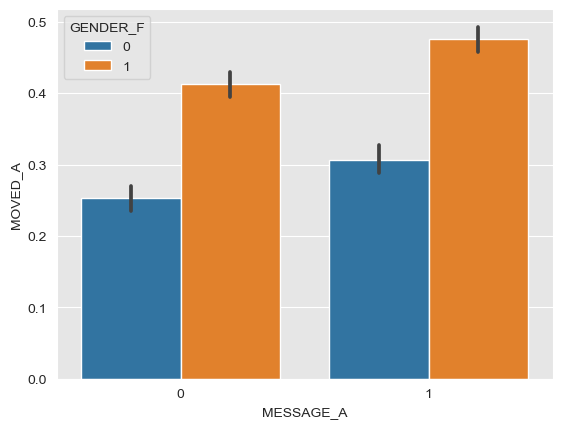

In [91]:
#barplot 1
sns.barplot(
    data=dfVoters,
    y=targetVar,
    x=flyerYN,
    hue='GENDER_F'
)

<Axes: xlabel='HH_ND', ylabel='MOVED_A'>

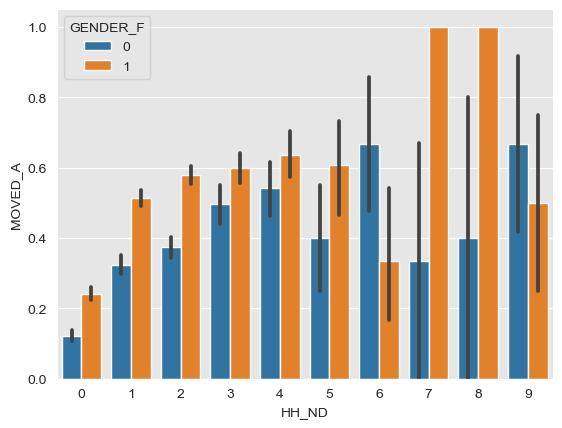

In [93]:
#barplot 2
sns.barplot(
    data=dfVoters,
    y=targetVar,
    x='HH_ND',
    hue='GENDER_F'
)

50.8697


<Axes: xlabel='CAND1S', ylabel='AGE'>

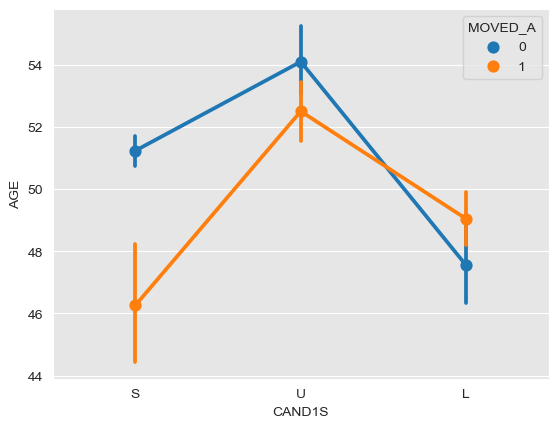

In [87]:
#PointPlot of AGE vs CAND
print(dfVoters['AGE'].mean())
sns.pointplot(
    data=dfVoters,
    y='AGE',
    x='CAND1S',
    hue=targetVar
)

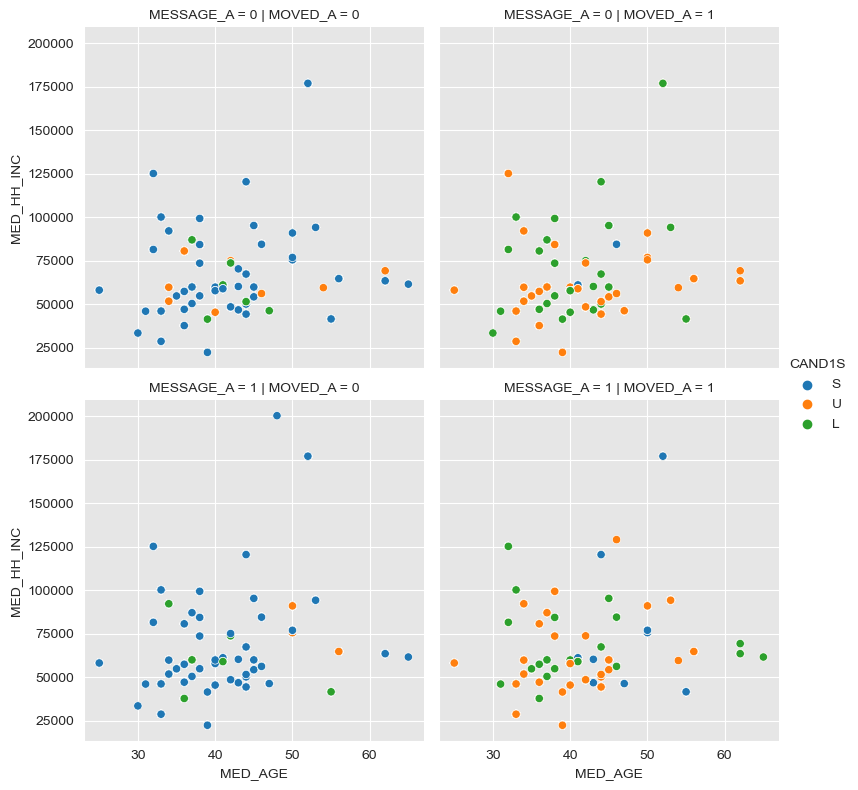

In [88]:
#lmplot
sns.relplot(
    data=dfVoters,
    x='MED_AGE',
    y='MED_HH_INC',
    hue='CAND1S',
    col=targetVar,
    row=flyerYN,
    height=4
)